## Agenda

### Exercise Description
Understanding trade-offs in model fitting, data quality, and generalisation.

### Intro

##### Model Complexity

- The ability of a machine learning model to fit patterns in data
- High complexity
    - High-degree polynomials
    - Overfitting
- Low complexity
    - Low-degree polynomials
    - Underfitting
- Bias-Variance tradeoff
    - High variance leads to overfitting
    - High bias leads to underfitting

#### Descriptive Statistics

- Understanding a data set
- Summarises key characteristics
- Numerical vs Categorical
- Numerical Summary
    - mean
    - median
    - mode (most frequent value)
    - range
    - variance
    - std. deviation
    - skewness (distrinution asymmetry)
    - kurtosis (thickness of distribution tail)
- Categorical Summary
    - counts / frequencies
    - most common values
    - percentages of a certain category found in data

## b) 02-model_complexity

This exercise was about experimenting with the impact of model complexity.

### Data Quality

- Garbage in, garbage out
- Great data > fancy algorithm
- Uncertainty:
    - Noise
    - Incomplete data
    - Biased data (not representing real-world distribution)

### Fitting

- Bias/Variance tradeoff - Balancing training and testing data
- Task 3 curve:
    - Illustrates underfitting
    - Illustrates overfitting
- Trial-and-error
    - n-order polynomial
    - Train/test split

### Data Cleaning

- Remove duplicates
- Remove irrelevant observations
- Remove structural errors
- Remove outliers (ONLY WITH A GOOD REASON like probable measurement error)
- Handle missing data

## c) 02-model_complexity

A model's ability to generalise to unseen data is determined by the accuracy of its predictions.
We can examine this concept by looking at the exercise in 02-model_complexity from week 7.

### Same as b)

### Cross Validation

- Compare different ml methods
- Train-test split
    - Training the model
    - Testing the algorithm
- K-Fold Cross Validation
- Leave-One-Out Cross Validation
- Model evaluation
    - Performance metrics like MSE (Mean Squared Error)




# Model Complexity and Overfitting
<article class="message is-info">
  <div class="message-header">Overview</div>
  <div class="message-body">
  
  In this exercise you will experiment with the impact of model complexity (higher order polynomial) and how it relates to Occam's Razor. 

  
  </div>
</article>


<article class="message">
    <div class="message-body">
        <strong>List of tasks</strong>
        <ul style="list-style: none;">
            <li>
            <a href="#poly_re">Task 1:  Polynomial regression</a>
            </li>
            <li>
            <a href="#occam_train">Task 2: Train and evaluate linear models with po…</a>
            </li>
            <li>
            <a href="#plot_results">Task 3: Plot the polynomials (models)</a>
            </li>
            <li>
            <a href="#reflection">Task 4: Reflection</a>
            </li>
            <li>
            <a href="#Different_data_func">Task 5: Changing the data generating function</a>
            </li>
        </ul>
    </div>
</article>

<div style="float: right; width: 50%; justify-content: start" class="block is-clearfix">

<div class="has-text-centered">
<figure class="image is-inline-block" >

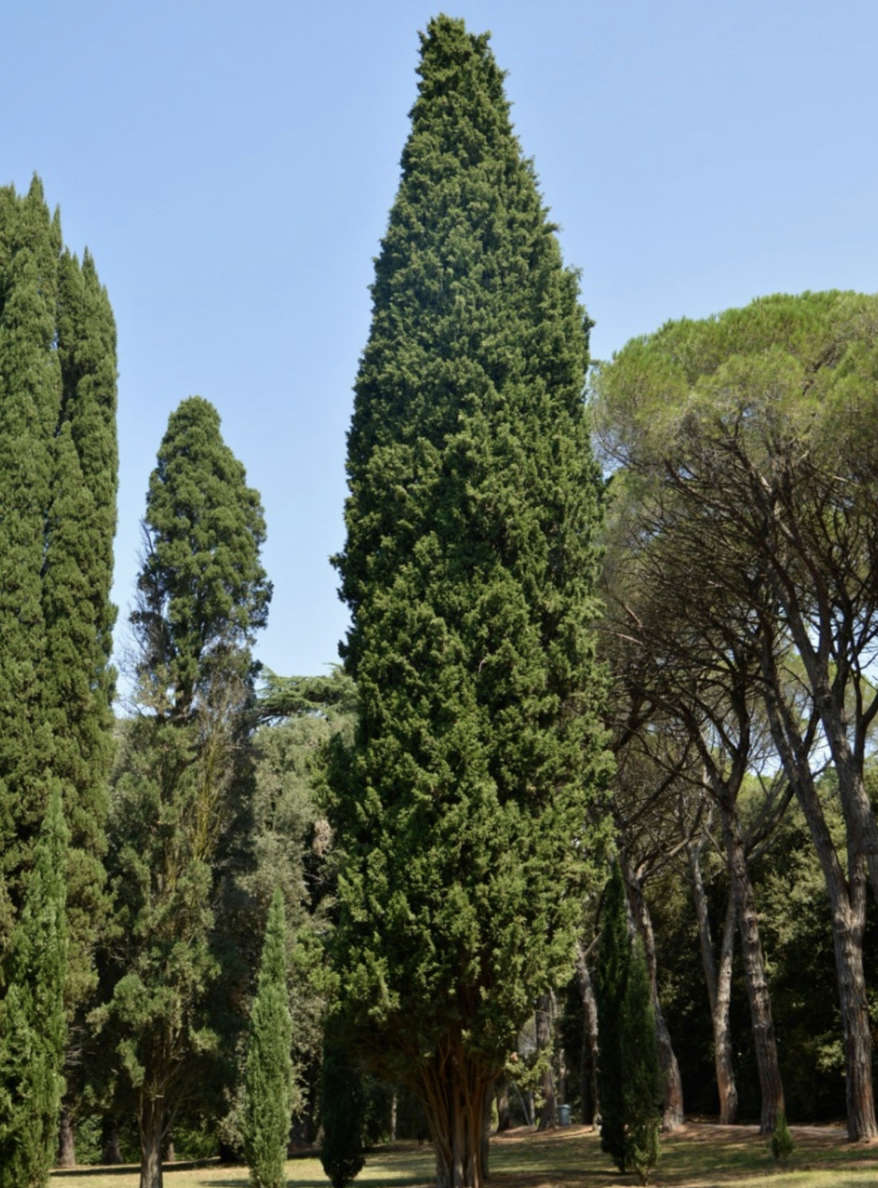


</figure>
</div>


</div>

This exercise is about making a regression model to predict the growth of Thuja Green Giant trees. You have to help the scientists decide which polynomial order best represents the training data to estimate future growth. To determine the optimal fit (model parameters), another group of researchers have provided you with  observation of height of their Thuja Green Giant trees from years later than currently observed by your team (`X_test`
 and `y_test`
). You will use this to choose the optimal model representing the growth of the Thuja Green Giant.
## Data
The following cell constructs and shows the data for the exercise. The data simulates growth (in meters) of one of the fastest growing trees, the Thuja Green Giant, each year. Scientists have observed and reported the growth of the tree for 7 years (`X_train`
 and `y_train`
), and now want to predict the future growth. 
The objective is to assist in making predictions based on this data. Additional data from another group has been provided to validate the hypothesis.
The scientists assume a polynomial relationship. 


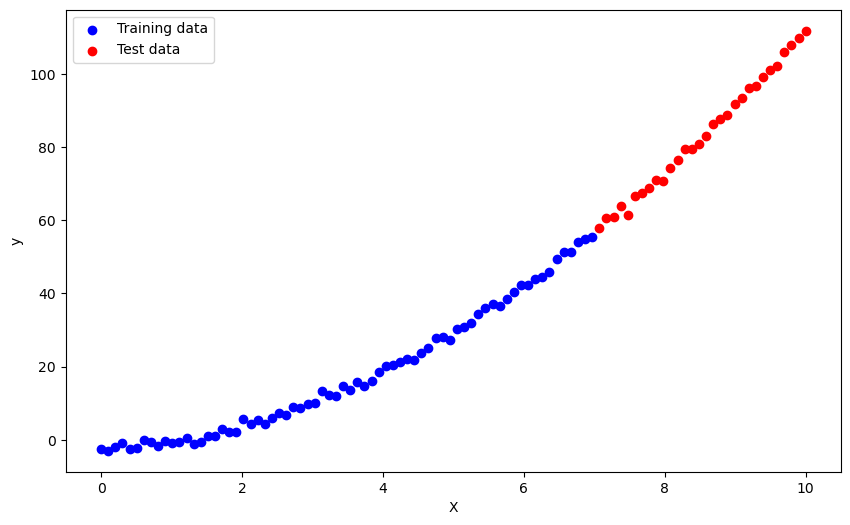

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
# Set a random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
n_samples = 100
X = np.linspace(0, 10, n_samples).reshape(-1, 1)
y_true = 1.5 * X.ravel() + 0.2
y_true = X.ravel() ** 2 + 1.5 * X.ravel() - 3
noise = np.random.normal(0, 1, n_samples)
y = y_true + noise

# Split the data into training and test sets
split_index = int(0.7 * n_samples)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]


# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.scatter(X_test, y_test, color='red', label='Test data')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

<article class="message task"><a class="anchor" id="poly_re"></a>
    <div class="message-header">
        <span>Task 1:  Polynomial regression</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


1. In this exercise you may reuse polynomial regression using least squares
 from the previous exercise, or use the `PolynomialFeatures()`
 method from the [scikit-learn library](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)
 to implement the `polynomial_regression()`
 method in the cell below. 



</div></article>



In [3]:
def polynomial_regression(X, y, degree):
    """
    Create and train a model of desired order and use it to predict the growth of the trees.

    :param X: Vector of combined observed years).
    :param y: Vector of combined observed height.
    :param degree: Degree of the model.

    :return: Vector containing prediction for training data, vector containing prediction for test data.
    """
    # Create a PolynomialFeatures object with the degree of the polynomial
    poly = PolynomialFeatures(degree=degree)
    # Transform the input data to add polynomial features
    X_poly = poly.fit_transform(X)
    # Create a LinearRegression object
    lin_reg = LinearRegression()
    # Fit the model using the transformed data
    lin_reg.fit(X_poly, y) # Train the model using least squares
    # Predict the values of the training set
    y_train_pred = lin_reg.predict(X_poly)
    # Predict the values of the test set
    X_test_poly = poly.transform(X_test)
    y_test_pred = lin_reg.predict(X_test_poly)
    return y_train_pred, y_test_pred


<article class="message task"><a class="anchor" id="occam_train"></a>
    <div class="message-header">
        <span>Task 2: Train and evaluate linear models with polynomial features</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


1. Use the function `polynomial_regression`
 to perform polynomial regression for each order defined in the `degrees`
 variable and predict the outcome for both the test and training data. 
2. Implement the function `compute_mse`
 that based on the predictions of a model and the ground truth targets returns the _mean-squared-error_.


$$ MSE = \frac{1}{m}\sum_{i=1}^{m}(f_{\mathbf{w}}(x_{i})-y_{i})^2$$
<article class="message is-info">
  <div class="message-header">Hint</div>
  <div class="message-body">
  
  You may save some time by modifying the implementation of the `rmse`
 function from the previous exercise.

  
  </div>
</article>

3. For each polynomial model calculate the _mean-squared-error_ for both the training and test data (use `polynomial_regression`
 and `compute_mse`
).



</div></article>



In [4]:
def compute_mse(y_true, y_pred):
    """Compute Mean Squared Error between true and predicted values."""
    return np.mean((y_true - y_pred) ** 2)

# Train and evaluate linear models with different polynomial features

degrees = [1, 2, 3, 4, 5, 6]
train_pred = []
test_pred = []
train_error = []
test_error = []

#write code/solution here ...
for degree in degrees:
    y_train_pred, y_test_pred = polynomial_regression(X_train, y_train, degree)
    train_pred.append(y_train_pred)
    test_pred.append(y_test_pred)
    train_error.append(compute_mse(y_train, y_train_pred))
    test_error.append(compute_mse(y_test, y_test_pred))

<article class="message task"><a class="anchor" id="plot_results"></a>
    <div class="message-header">
        <span>Task 3: Plot the polynomials (models)</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


Run the cell below to:
1. Plot the data so that training and test data have different colors.
2. Plot the predictions of the polynomial models over the scatter plot showing the given data. Perform this for both the training and test sets using X as input.



</div></article>



(0.0, 70.0)

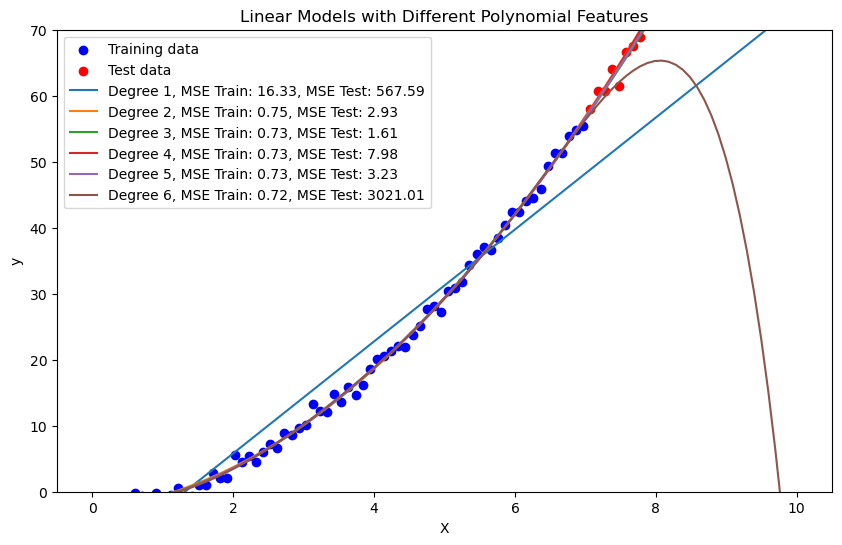

In [5]:
# Plot the results

plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.scatter(X_test, y_test, color='red', label='Test data')

for i, degree in enumerate(degrees):
    plt.plot(X, np.concatenate((train_pred[i],test_pred[i])), label=f'Degree {degree}, MSE Train: {train_error[i]:.2f}, MSE Test: {test_error[i]:.2f}')
plt.xlabel('X')
plt.ylabel('y')
plt.ylim(0,22)
plt.legend()
plt.title('Linear Models with Different Polynomial Features')
# plt.show()
# Insert code for question 1
# The following line keep axis fixed in a plot
plt.ylim(0,70)
# Insert code for question 2
# Plot the predictions of the polynomial models over the scatter plot showing the given data. Perform this for both the training and test sets using X as input.



<article class="message task"><a class="anchor" id="reflection"></a>
    <div class="message-header">
        <span>Task 4: Reflection</span>
        <span class="has-text-right">
          <i class="bi bi-lightbulb-fill"></i><i class="bi bi-stoplights medium"></i>
        </span>
    </div>
<div class="message-body">


Reflect on:
1. Which model had the best performance  on the training data?
2. Which model had the best performance  on the test data?
3. How does the complexity (degree) of the model affect the performance on the training and test data?
4. Which model(s) shows signs of overfitting? How can you tell?



</div></article>



In [0]:
# Write reflection here
# 1. Model with 6. degree polynomial has the lowest MSE for the training data, but the highest MSE for the test data. This is a sign of overfitting.
# 2. Model with 1. degree polynomial has the lowest MSE for the test data, but the highest MSE for the training data, but only by very little.
# 3. The higher the degree of the polynomial, the more the model overfits the training data.
# 4. The model with 6. degree polynomial shows significant signs of overfitting. 3. and 4. degree polynomials also show signs of overfitting. The best model for this data seems to be the one with 1. degree polynomial, since it does well on both training and test data.

<article class="message task"><a class="anchor" id="Different_data_func"></a>
    <div class="message-header">
        <span>Task 5: Changing the data generating function</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-lightbulb-fill"></i><i class="bi bi-stoplights medium"></i>
        </span>
    </div>
<div class="message-body">


How do the results change if the underlying function generating the data was changed to a 2. order polynomial, so that it e.g. simulates bacteria growth instead? 
1. Re-generate the data by replacing `y_true`
 with $y=f(x)=x^2+1.5x-3$ in the data generation step, and rerun the other code blocks.
2. Does it still make sense to follow the strategy of Occam's razor?



</div></article>



In [0]:
# Write reflection